In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error
import pydmd
import backtrader as bt
import yfinance as yf

import backtrader.analyzers as btanalyzers
from datetime import datetime
import backtrader.feeds as btfeeds
import math


In [2]:
sym = pd.read_csv("DATA/nse100_SYM.csv",header=None) 
sym = sym[0].tolist()
SYM =[ i + ".NS" for i in sym]

In [3]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/NSE100.csv",header=None) #VARIABLE 1
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

In [4]:
# function returns the index of the stock in the matrix
def get_index(sym):
    return SYM.index(sym)
    

In [5]:
def dmd_pred(j,i=12) :
    # creating the matrix mat 
    # i days are trained j th day from last 
    mat = matx.iloc[:, -(i)+j:j]
    mat=mat.to_numpy()


    # dmd 
    dmd = pydmd.DMD(svd_rank=mat.shape[1])
    dmd.fit(mat)
    d_ind = np.argmax(np.abs(dmd.amplitudes.real))


    if any(np.abs(dmd.eigs.real)>1) and dmd.amplitudes.real[d_ind] > 0 :
    # if np.abs(dmd.eigs.real[d_ind])>1 and dmd.eigs.imag[d_ind] == 0 and dmd.amplitudes.real[d_ind] > 0 :
        d_ind = np.argsort(dmd.modes[:,d_ind].real)[-5:]
        return (True,d_ind)
 
        
 
    else:
        return (False,[0 ,0 ,0 ,0 ,0])



In [6]:
cash = 1000000

In [7]:
# array n  with true at [22 29 60 95 61]




In [9]:
portfolio = []
st1 = 0
st2 = 0
st3 = 0
st4 = 0
st5 = 0
invest = True
for j in range(16,len(matx.columns)):
    if dmd_pred(j)[0]:
        try:        
            s1 = matx[j][p[0]]
            s2 = matx[j][p[1]]
            s3 = matx[j][p[2]]
            s4 = matx[j][p[3]]
            s5 = matx[j][p[4]]


            cash = cas + st1*s1+ st2*s2+ st3*s3+ st4*s4+ st5*s5
        except:
            pass
        p = dmd_pred(j)
        p=p[1]
        s1 = matx[j][p[0]]
        s2 = matx[j][p[1]]
        s3 = matx[j][p[2]]
        s4 = matx[j][p[3]]
        s5 = matx[j][p[4]]
        st1 = math.floor((cash/5)/s1)
        st2 = math.floor((cash/5)/s2)
        st3 = math.floor((cash/5)/s3)
        st4 = math.floor((cash/5)/s4)
        st5 = math.floor((cash/5)/s5)
        cas = cash - st1*s1- st2*s2- st3*s3- st4*s4- st5*s5
        invest = False

    else :
        if s1 != 0:
            s1 = matx[j][p[0]]
            s2 = matx[j][p[1]]
            s3 = matx[j][p[2]]
            s4 = matx[j][p[3]]
            s5 = matx[j][p[4]]
            cash = cas + st1*s1+ st2*s2+ st3*s3+ st4*s4+ st5*s5
            s1 = 0
            invest = True
    
    portfolio.append(cash)




In [10]:
(cash/1000000)*100

105.01053000000043

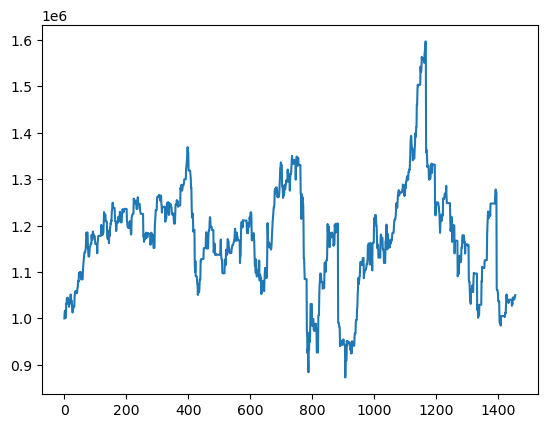

In [11]:
plt.plot(portfolio)